In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [26]:
df = pd.read_csv('csv/processed_tickets_en.csv')
df.sample(3)

,processed_text,type,queue,priority,urgency
626,Ticket Opened: AWS resource configuration issu...,Incident,IT Support,medium,not_urgent
736,Urgent: Fix AWS infrastructure outage issue. D...,Request,Service Outages and Maintenance,high,urgent
297,Assistance required for AWS implementation. De...,Request,Technical Support,high,urgent


In [27]:
df.shape

(1564, 5)

In [28]:
df_synthesized = pd.read_csv('csv/synthesized_tickets.csv')
df_synthesized.sample(3)

,processed_text,subject,body,urgency
1441,Feedback Needed on Website Design. Consider ad...,Feedback Needed on Website Design,Consider adding more details to the FAQ sectio...,not_urgent
2247,High-Priority: Payment Gateway Down. Sensitive...,High-Priority: Payment Gateway Down,Sensitive data has been exposed; we need to se...,urgent
2877,Critical Alert: Unauthorized Access Detected. ...,Critical Alert: Unauthorized Access Detected,Firewall settings need to be reviewed to addre...,urgent


In [29]:
df_synthesized.shape

(3000, 4)

In [31]:
# merge the two datasets
df = pd.concat([df, df_synthesized], axis=0)
df.shape

(7564, 7)

In [33]:
df.processed_text.isna().sum()

np.int64(0)

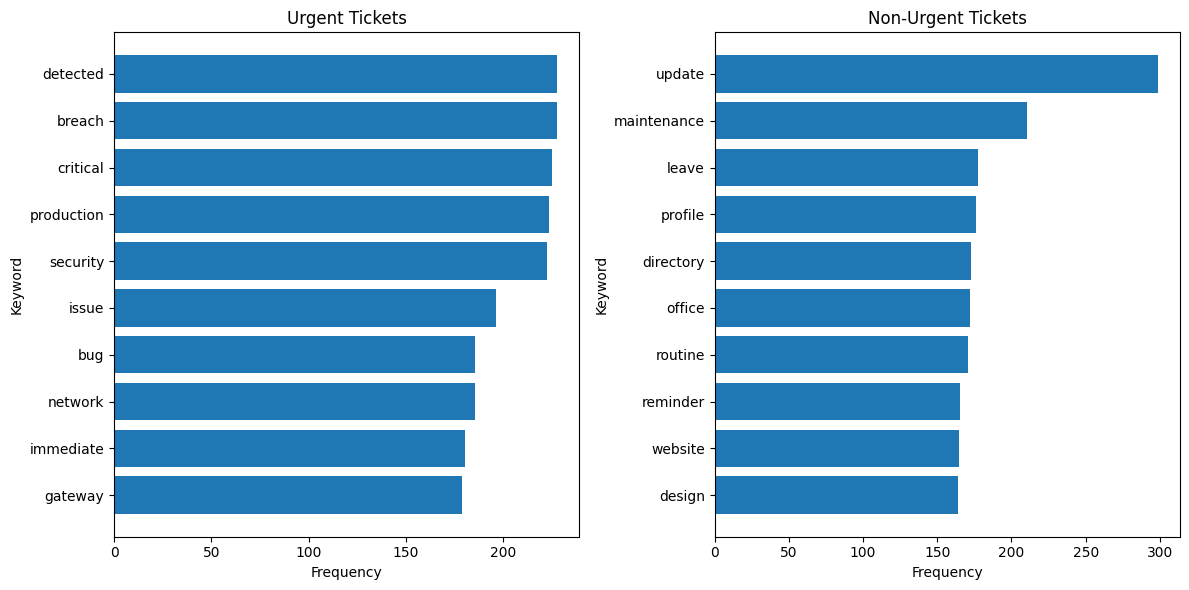

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

urgent_tickets = df[df['urgency'] == 'urgent']
non_urgent_tickets = df[df['urgency'] != 'urgent']

def create_charts(ax, df, title): 
    tdidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
    tdidf_matrix = tdidf_vectorizer.fit_transform(df['processed_text'])
    
    
    feature_names = tdidf_vectorizer.get_feature_names_out()
    word_scores = zip(feature_names, tdidf_matrix.sum(axis=0).tolist()[0])

    top_words = sorted(word_scores, key=lambda x: x[1], reverse=True)[:10]
    
    keywords, frequencies = zip(*top_words)
    
    ax.barh(keywords, frequencies)
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Keyword')
    ax.invert_yaxis()
    
# two on one row
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
create_charts(axs[0], urgent_tickets, 'Urgent Tickets')
create_charts(axs[1], non_urgent_tickets, 'Non-Urgent Tickets')
plt.tight_layout()


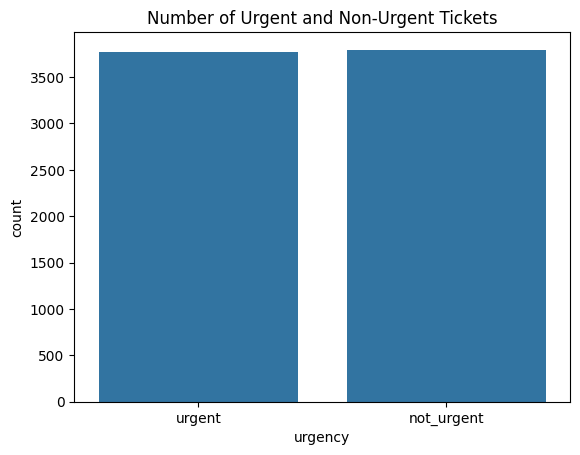

In [35]:
# visualize number of urgent and not-urgent tickets
sns.countplot(data=df, x='urgency')
plt.title('Number of Urgent and Non-Urgent Tickets')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

X = df[['processed_text']]
y = df['urgency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
text_transformer = Pipeline([
    ('tfidf', TfidfVectorizer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text_tfidf', text_transformer, 'processed_text')
    ],
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  not_urgent       0.97      0.98      0.98       723
      urgent       0.99      0.97      0.98       790

    accuracy                           0.98      1513
   macro avg       0.98      0.98      0.98      1513
weighted avg       0.98      0.98      0.98      1513



In [46]:
# Example prediction
example = pd.DataFrame({
    'processed_text': ['Server Down: The server is not responding']
})

urgency = pipeline.predict(example)
print(f'Predicted urgency: {urgency[0]}')


Predicted urgency: urgent


In [47]:
from sklearn.svm import SVC

pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

In [48]:
pipeline_svm.fit(X_train, y_train)

y_pred_svm = pipeline_svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

  not_urgent       1.00      1.00      1.00       723
      urgent       1.00      1.00      1.00       790

    accuracy                           1.00      1513
   macro avg       1.00      1.00      1.00      1513
weighted avg       1.00      1.00      1.00      1513



In [50]:
# Example prediction
example = pd.DataFrame({
    'processed_text': ['Server Down: The server is not responding']
})

urgency = pipeline.predict(example)
print(f'Predicted urgency: {urgency[0]}')


Predicted urgency: not_urgent


In [53]:
import numpy as np
# Load GloVe embeddings (download the file and provide its path)
embedding_dict = {}
with open('glove.6B.50d.txt', encoding="utf8") as f:  # Replace with the path to your GloVe file
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embedding_dict[word] = vector

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.50d.txt'